In [1]:
pip install pandas matplotlib scipy seaborn scikit-learn numpy

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt


In [5]:
from scipy import stats

In [6]:
from sklearn.preprocessing import StandardScaler


In [7]:
import numpy as np

In [8]:
from sklearn.model_selection import train_test_split


In [9]:
from sklearn.linear_model import LinearRegression


In [10]:
from sklearn.metrics import mean_squared_error, r2_score


In [11]:
from sklearn.preprocessing import MinMaxScaler


In [15]:
df=pd.read_csv(r'/content/House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [16]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB
None
               BHK          Rent         Size     Bathroom
count  4746.000000  4.746000e+03  4746.000000  4746.000000
mean      2.083860  3.499345e+04   967.490729     1.965866
s

# New Section

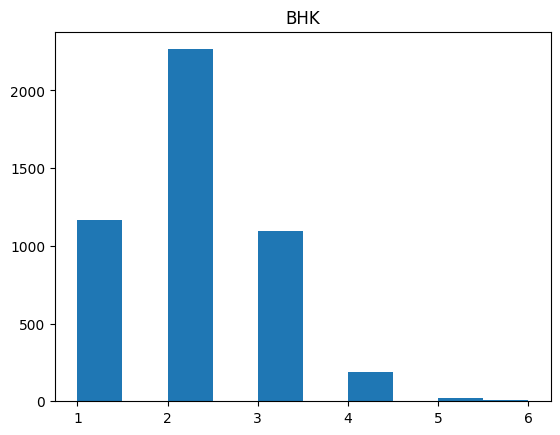

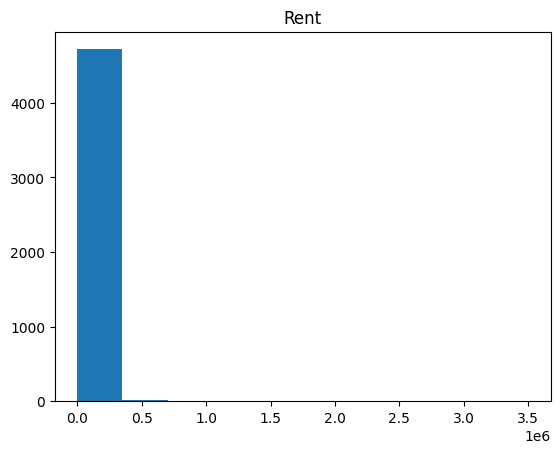

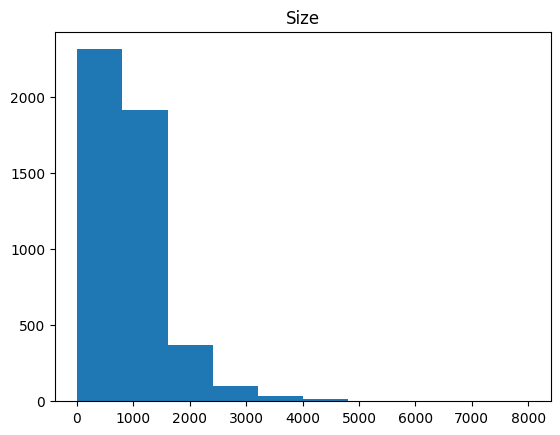

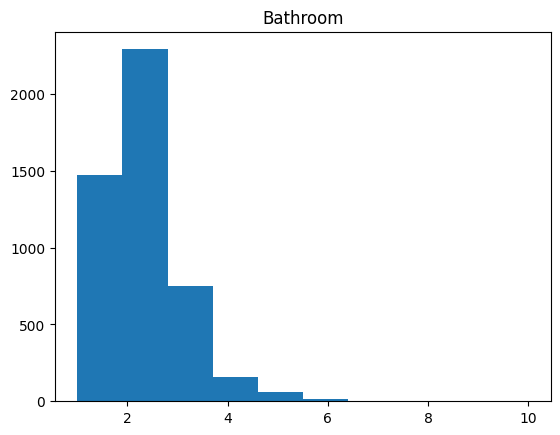

In [17]:
#Exploratory Data Analysis
numericcolumns=df.select_dtypes(include=['float64','int64']).columns
for col in numericcolumns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

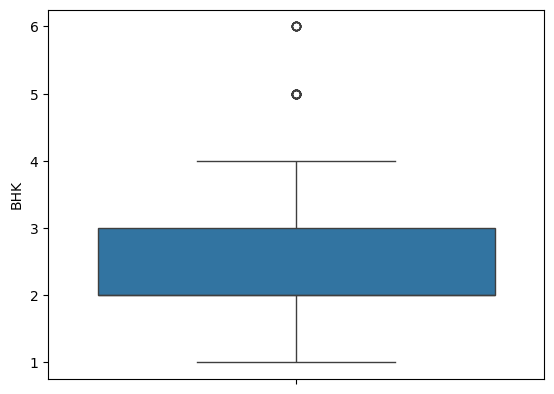

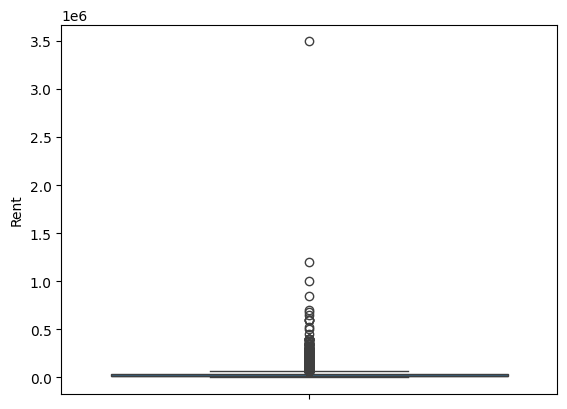

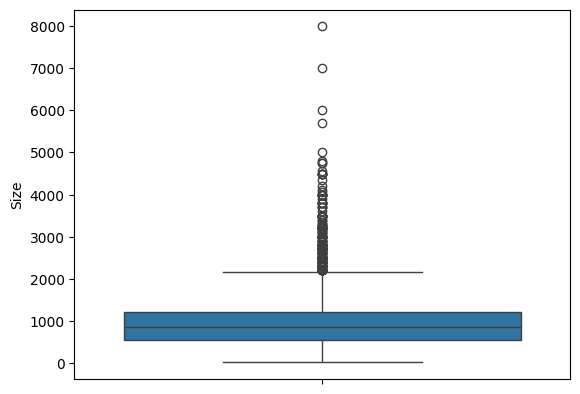

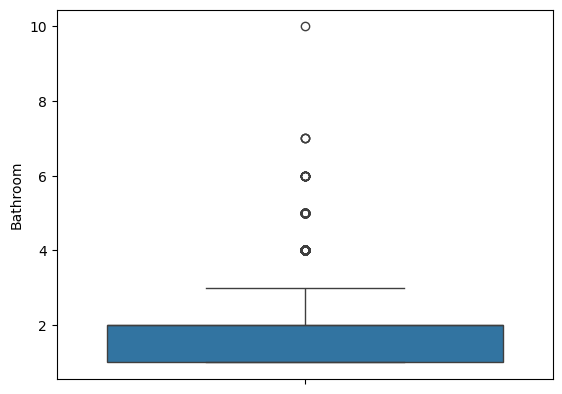

In [18]:
for col in numericcolumns:
        sns.boxplot(y=df[col])
        plt.show()

In [45]:
df=pd.read_csv(r'/content/House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


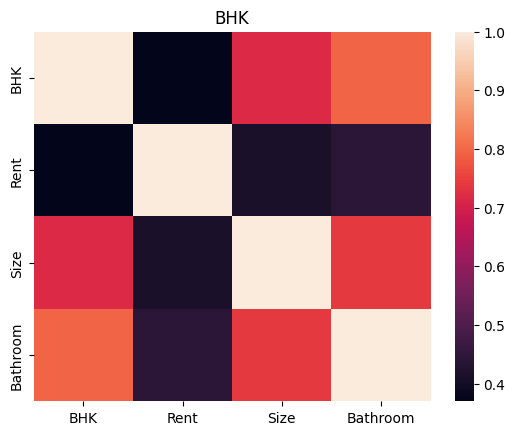

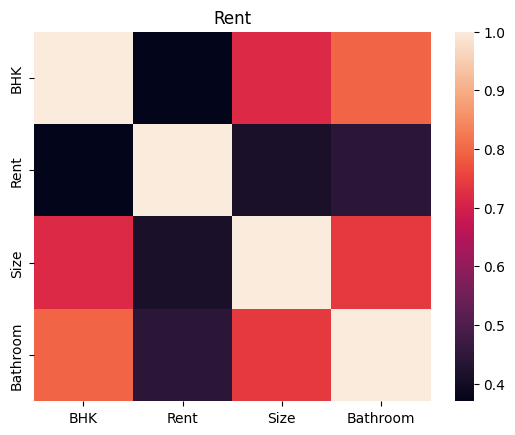

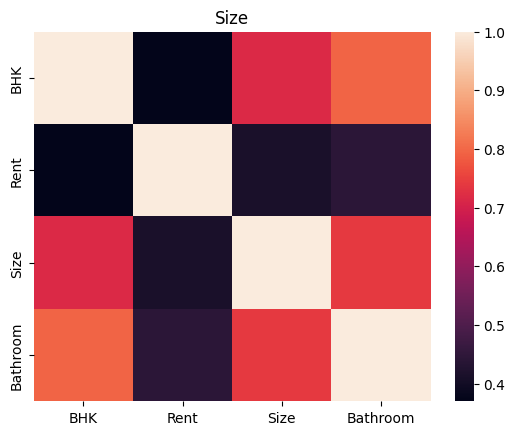

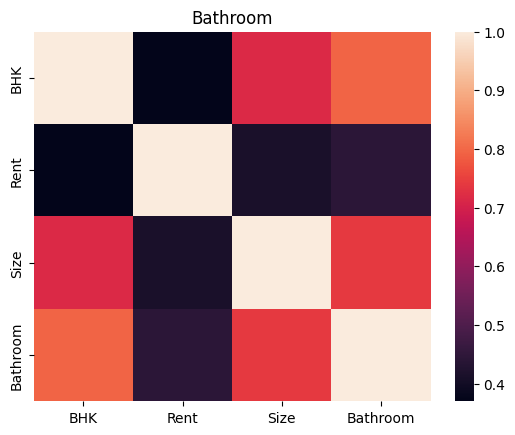

In [33]:
for col in numericcolumns:
    correlation_matrix=df[numericcolumns].corr()
    sns.heatmap(correlation_matrix)
    plt.title(col)
    plt.show()

In [30]:
missing=df.isnull().sum()
print(missing)

0


In [35]:
for col in numericcolumns:
    df[col] = df[col].fillna(df[col].mean())


In [36]:
#removing outliers
zscoress=stats.zscore(df[numericcolumns])
df=df[(abs(zscoress)<3)].all(axis=1)

In [49]:
#covert categorical data into nummerical data
df['Bathroom']=df['Bathroom'].astype(str).map({'0': 'Zero','1': 'One','2': 'Two','3': 'Three','4': 'Four','5': 'Five'})

In [50]:
print(df.columns)


Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')


In [51]:
print(df['Bathroom'])

0         Two
1         One
2         One
3         One
4         One
        ...  
4741      Two
4742    Three
4743    Three
4744      Two
4745      Two
Name: Bathroom, Length: 4746, dtype: object


In [52]:
df['Bathroom']=df['Bathroom'].astype(str).map({'Zero': '0','One': '0','Two': '2','Three': '3','Four': '4','Five': '5'})

In [53]:
print(df['Bathroom'])

0       2
1       0
2       0
3       0
4       0
       ..
4741    2
4742    3
4743    3
4744    2
4745    2
Name: Bathroom, Length: 4746, dtype: object


In [54]:
numericcolumns=df.select_dtypes(include=['float64','int64'])
scaleddata = StandardScaler()
scaledcols = pd.DataFrame(scaleddata.fit_transform(numericcolumns), columns=numericcolumns.columns)
#fit-scaling data-finding the mean n std deviation ; transform-scales the data ; pd.DataFrame-coverts it back into columns

In [55]:
print(scaledcols)

          Rent      Size
0    -0.320026  0.208960
1    -0.191982 -0.264125
2    -0.230395  0.051265
3    -0.320026 -0.264125
4    -0.352037 -0.185277
...        ...       ...
4741 -0.256004  0.051265
4742 -0.076743  1.628216
4743  0.000084  1.233978
4744  0.128128  0.839741
4745 -0.256004  0.051265

[4746 rows x 2 columns]


In [56]:
numericcolumns=df.select_dtypes(include=['float64','int64'])
x = numericcolumns.drop(columns=['Rent'])
y = numericcolumns['Rent']
xtrain, xtest, ytrain, ytest = train_test_split(x , y, test_size=0.8,random_state=1)

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [68]:
ypred=model.predict(xtest)
ypred = [max(0, value) for value in ypred]

In [69]:
comparision = pd.DataFrame({'actual':ytest,'Predicted':ypred})
print(comparision)

      actual     Predicted
230    18000  21607.096944
4500   10500  34680.503174
3277   16000  25342.355867
4045   13000  23474.726406
1561    9500  15257.156776
...      ...           ...
863    30000  16004.208560
2546   16000      0.000000
2089   18000  32812.873713
991   150000  44018.650481
914   100000  10401.320176

[3797 rows x 2 columns]


In [70]:
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)


In [71]:
print(mse)

5949699164.190372


In [72]:
print(r2)

0.14876460006183334


In [87]:
model1=RandomForestRegressor()
model1.fit(xtrain,ytrain)

RandomForestRegressor()

In [88]:
ypred=model1.predict(xtest)
ypred = [max(0, value) for value in ypred]
comparision = pd.DataFrame({'actual':ytest,'Predicted':ypred})
print(comparision)
mse1 = mean_squared_error(ytest, ypred)
r21 = r2_score(ytest, ypred)
print(mse1,r21)

      actual     Predicted
230    18000  18674.732332
4500   10500  44297.718677
3277   16000  19469.027935
4045   13000  20180.812109
1561    9500  29671.067323
...      ...           ...
863    30000  16953.508787
2546   16000  12024.584416
2089   18000  29671.683895
991   150000  34762.289534
914   100000   9920.375163

[3797 rows x 2 columns]
6051145164.940975 0.13425051714133696


In [75]:
from sklearn.tree import DecisionTreeRegressor


In [89]:
model2=DecisionTreeRegressor()
model2.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [90]:
ypred=model2.predict(xtest)
ypred = [max(0, value) for value in ypred]
comparision = pd.DataFrame({'actual':ytest,'Predicted':ypred})
print(comparision)
mse2 = mean_squared_error(ytest, ypred)
r22 = r2_score(ytest, ypred)
print(mse2,r22)

      actual     Predicted
230    18000  18441.930233
4500   10500  43312.500000
3277   16000  18930.404762
4045   13000  20878.260870
1561    9500  36000.000000
...      ...           ...
863    30000  16568.181818
2546   16000  11750.000000
2089   18000  30428.571429
991   150000  35375.000000
914   100000   9817.869565

[3797 rows x 2 columns]
6254287787.324452 0.10518649446774386


In [91]:
compare1=pd.DataFrame({'RFG':mse1 , 'DTG':mse2},index=['Mean Squared Error'])
print(compare1)

                             RFG           DTG
Mean Squared Error  6.051145e+09  6.254288e+09
